In [1]:
import json
import pandas as pd
import numpy as np
from itertools import chain
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
def get_data(exp_path):
    chromos = []
    with open(exp_path, "r") as f:
        results = json.load(f)
        for fitness, chromo in zip(results["pop_vals"], results["chromos"]):
            c = list(chain.from_iterable(chromo[1]))
            c.append(fitness[1])
            chromos.append(c)
    columns = list(chain.from_iterable([[f"aug{i}", f"op{i}"] for i in range(1, 4)]))
    columns.append("test acc")
    columns
    df = pd.DataFrame(chromos, columns=columns)
    
    # create data in long format
    ops = set(list(df["aug1"]) + list(df["aug2"]) +  list(df["aug3"]))
    indexes = {op:i for i, op in enumerate(ops)}
    chromos_long = np.zeros([len(chromos), len(ops)+1])
    for i, c in enumerate(chromos):
        for aug, intensity in zip(c[:-2][::2], c[:-2][1::2]):
            chromos_long[i][indexes[aug]] = intensity
            chromos_long[i][-1] = c[-1]
    columns_long = list(ops) + ["fitness"]
    df_long = pd.DataFrame(chromos_long, columns = columns_long)
    return df, df_long, ops



In [3]:
b256 = [
    "/home/noah/ESSL/cc_experiments/models_figs/opts/xp8_0/previous/runexp8-0/6/outcomes.json",
    "/home/noah/ESSL/cc_experiments/models_figs/opts/xp8_1/runexp8-1/4/outcomes.json",
    "/home/noah/ESSL/cc_experiments/models_figs/opts/xp8_2/runexp8-2/5/outcomes.json",
    "/home/noah/ESSL/cc_experiments/models_figs/opts/xp8_3/0/outcomes.json"
]

b256_names = ["SwaV", "BYOL", "SimSiam", "NNCLR"]

b32 = [
    "/home/noah/ESSL/exps/iteration4/exp6_1/6/outcomes.json",
    "/home/noah/ESSL/cc_experiments/models_figs/opts/xp6_2/runexp6-2/8/outcomes.json",
    "/home/noah/ESSL/exps/iteration4/exp6_3_0/3/outcomes.json",
    "/home/noah/ESSL/exps/iteration4/exp6_0/3/outcomes.json"
]

b32_names = ["SwaV", "BYOL", "SimSiam", "NNCLR"]


[84.145 84.145 84.145 84.145 84.145 84.145 84.24  84.33  84.36  84.36 ]
[84.28 84.28 84.28 84.28 84.28 84.28 84.28 84.38 84.38 84.38]
[84.01 84.01 84.01 84.01 84.01 84.01 84.2  84.28 84.34 84.34]


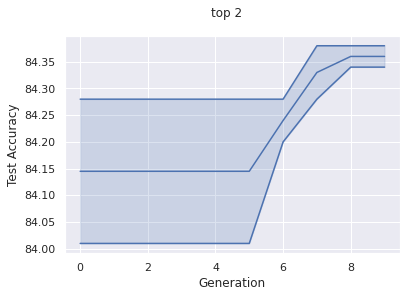

[83.99       83.96333333 84.07       84.07       84.07       83.96333333
 84.16333333 84.28666667 84.33333333 84.33333333]
[84.28 84.28 84.28 84.28 84.28 84.28 84.28 84.38 84.38 84.38]
[83.68 83.6  83.92 83.92 83.92 83.6  84.01 84.2  84.28 84.28]


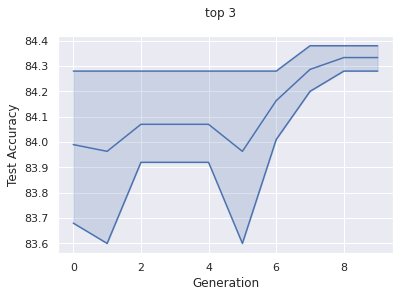

[83.83  83.738 83.866 83.964 83.904 83.78  84.054 84.172 84.188 84.278]
[84.28 84.28 84.28 84.28 84.28 84.28 84.28 84.38 84.38 84.38]
[83.51 83.26 83.34 83.69 83.45 83.45 83.79 83.99 83.95 84.11]


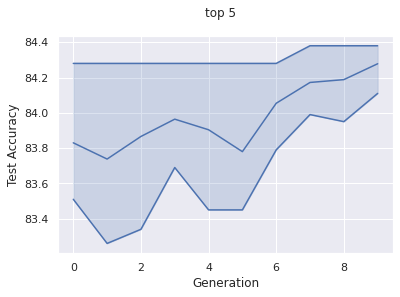

[83.489 83.476 83.502 83.732 83.593 83.54  83.63  83.837 83.813 83.879]
[84.28 84.28 84.28 84.28 84.28 84.28 84.28 84.38 84.38 84.38]
[82.83 83.16 83.07 83.34 83.19 83.08 82.98 83.11 83.22 83.22]


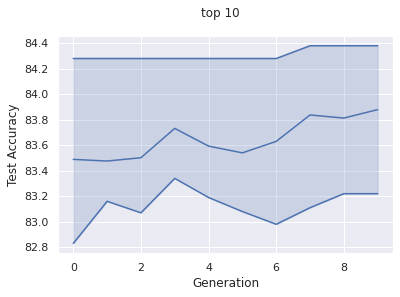

[83.164      83.15933333 83.268      83.48466667 83.30466667 83.35266667
 83.29066667 83.48333333 83.46666667 83.58933333]
[84.28 84.28 84.28 84.28 84.28 84.28 84.28 84.38 84.38 84.38]
[82.29 82.06 82.69 82.69 82.24 82.92 81.69 82.6  82.13 82.83]


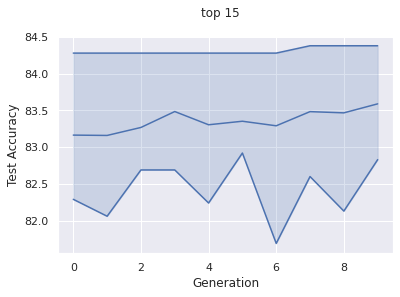

<Figure size 432x288 with 0 Axes>

In [4]:
with open(b256[0], "r") as f:
    data = json.load(f)
    

pop_vals = defaultdict(list)
for g, val in data['pop_vals']:
    pop_vals[g].append(val)
    

for k in [2,3,5,10, 15]:
    topk = {key:sorted(v, reverse=True)[:k] for key, v in pop_vals.items()}
    topk = np.array(list(topk.values())).transpose()
    avg_vals = np.mean(topk, axis=0)
    max_vals = topk.max(axis=0)
    min_vals = topk.min(axis=0)
    print(avg_vals)
    print(max_vals)
    print(min_vals)
    plt.plot(range(len(avg_vals)), avg_vals, 'b-')
    plt.plot(range(len(max_vals)), max_vals, 'b-')
    plt.plot(range(len(min_vals)), min_vals, 'b-')
    plt.fill_between(range(len(min_vals)),min_vals, max_vals, color='b',
                     alpha=0.2)
    plt.xlabel("Generation")
    plt.ylabel("Test Accuracy")
    plt.xticks = range(len(max_vals))
    plt.suptitle(f"top {k}")
    plt.savefig(os.path.join(plot_dir, f"min_max.png"))
    plt.clf()
        
        
        
        
        
#     plt.suptitle(f"top {k}")
#     plt.show()
#     plt.clf()